## Task of DIP Lab Final 2024(SEC 2019-20):
1.  Upload the image(`DIP_Lab_task_01.png`) from drive with extracting details like: image dimension, frequency distribution of intensities, range. [5]
2.  Convert the RGB image(`DIP_Lab_task_02.jpg`) to a gray scale image and compare a sub-region of the image by intensity values(5*5 dimension would be enough for comparison). [10]
3.  Apply Image(`DIP_Lab_task_03.png`) smoothing with appropriate kernel applied. Identify the noise(if any) before processing. [35]
4.  Implement an appropriate technique to reduce the brightness of the provided image (`DIP_Lab_task_04.jpg`) effectively. [20]
5.  Solve the segmentation problem for the given image: `'DIP_Lab_task_05.jpg'` [30]



In [12]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# TASK 1: Image dimension, frequency distribution of intensities, range.

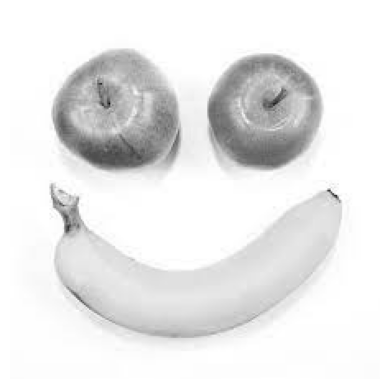

Image Dimensions: (225, 225)
Intensity Range: [5, 255]


In [21]:
img = cv2.imread("/content/drive/MyDrive/DIP Lab Resources/Assignment/DIP_Lab_task_01.png")
plt.imshow(img)
plt.axis('off')
plt.show()

height, width, color_channels = img.shape
print(f"Image Dimensions: {height,width}")
print(f"Intensity Range: [{img.min()}, {img.max()}]")

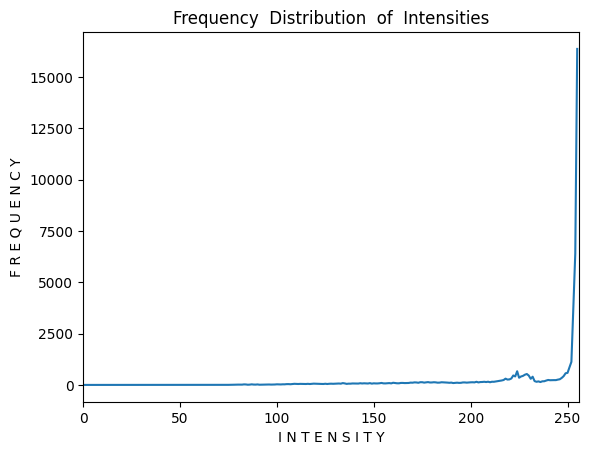

In [22]:
histogram = cv2.calcHist([img], [0], None, [256], [0, 256])

plt.figure()
plt.title("Frequency  Distribution  of  Intensities")
plt.xlabel("I N T E N S I T Y")
plt.ylabel("F R E Q U E N C Y")
plt.plot(histogram)
plt.xlim([0, 256])
plt.show()

# Task 2: Convert rgb image to gray scale image and compare a sub-region of the image by intensity values

In [23]:
img = cv2.imread("/content/drive/MyDrive/DIP Lab Resources/Assignment/DIP_Lab_task_02.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [24]:
def ConvertToGray(image):
  rows, cols, channels = image.shape

  gray_image = np.zeros((rows, cols))
  gray_image = gray_image.astype(np.uint8)
  for i in range(rows):
    for j in range(cols):
      r, g, b = image[i, j]
      gray_image[i, j] = r*0.29 + g*0.58 + b*0.11

  return gray_image

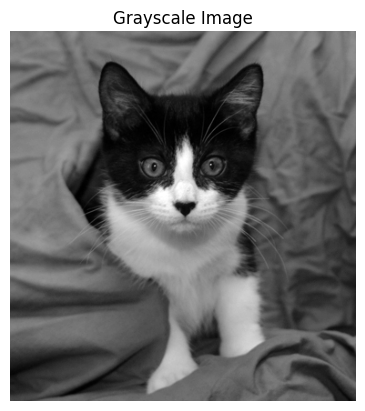

In [25]:
img_gray = ConvertToGray(img)
plt.imshow(img_gray, cmap ='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()

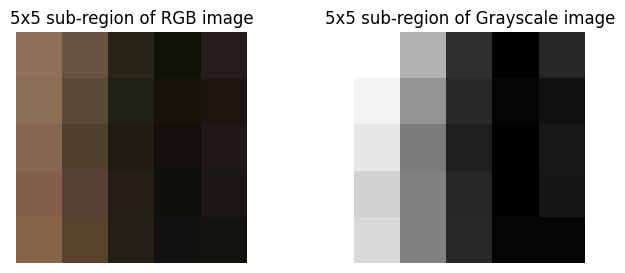

In [26]:
sub_region_rgb = img_rgb[100:105, 100:105]
sub_region_gray = img_gray[100:105, 100:105]

plt.figure(figsize=(8, 3))

plt.subplot(1, 2, 1)
plt.imshow(sub_region_rgb)
plt.title('5x5 sub-region of RGB image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sub_region_gray, cmap = 'gray')
plt.title('5x5 sub-region of Grayscale image')
plt.axis('off')

plt.show()